#### Task 4: Model Evaluation

Steps:
- Evaluate the model using metrics such as Mean Squared Error (MSE), R-squared.
- Plot residuals to check the assumptions of linear regression.
- Compare model performance with different feature sets or preprocessing steps.
- Script: scripts/evaluate_model.py

In [1]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

In [2]:
# load the model
loaded_model = load("../data/linearRegression.joblib")

In [3]:
#load the preprocessed and split data

data = np.load("../data/train_test_split.npz")

X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

In [4]:
# predict the values of y

y_pred = loaded_model.predict(X_test)

In [5]:
#Evaluate the model MSE, R2

from sklearn.metrics import mean_squared_error, r2_score

In [6]:
print("Mean Squared Erorr: ", mean_squared_error(y_test, y_pred))
print("R-Squared: ", r2_score(y_test, y_pred))

Mean Squared Erorr:  0.00704721963449375
R-Squared:  0.7353514041647737


In [7]:
#compute residuals
residuals = y_test - y_pred


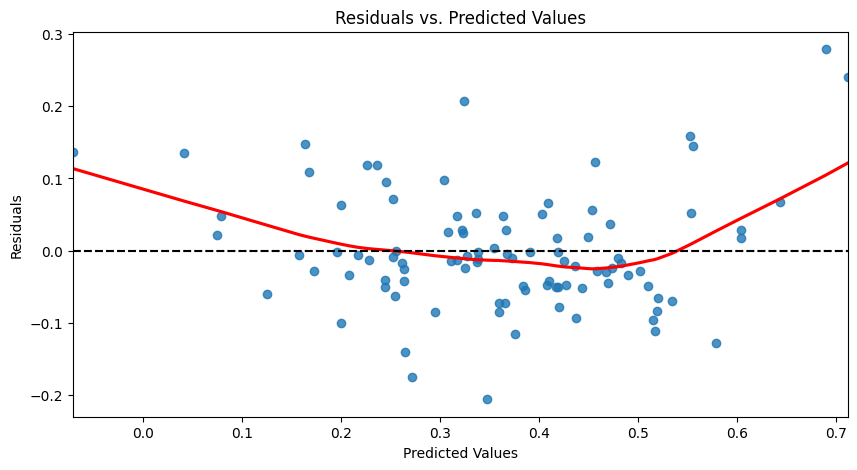

In [8]:
#visualize residuals

plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


- Residuals randomly scattered around 0 -> linearity assumption holds

- Random scatter of points -> homoscedasticity assumptions holds

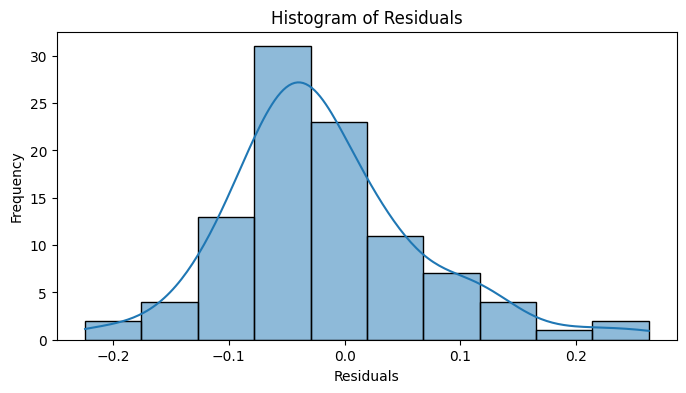

In [9]:
# check for normality using histogram

# Histogram of Residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

histogram is roughly normal -> residuals are normally distributed